In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# 
df = pd.read_csv('cleaned.csv')
df.head()

,Country,Country_Code,Year,Population,GDP_Per_Capita
0,Afghanistan,AFG,1999,19262847,182.81
1,Afghanistan,AFG,2000,19542982,180.19
2,Afghanistan,AFG,2001,19688632,142.90
3,Afghanistan,AFG,2002,21000256,182.17
4,Afghanistan,AFG,2003,22645130,199.64


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5200 non-null   object 
 1   Country_Code    5200 non-null   object 
 2   Year            5200 non-null   int64  
 3   Population      5200 non-null   int64  
 4   GDP_Per_Capita  5200 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 203.2+ KB


In [196]:
# Define the function to map country to groups
def map_country_to_group(country):
    if country in ['Canada', 'United State', 'France', 'Germany', 'Japan', 'United Kingdom', 'Italy',
                   'Albania', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia',
                   'Finland', 'Greece', 'Hungary', 'Iceland', 'Latvia', 'Lithuania', 'Luxembourg',
                   'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
                   'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden']:
        return 0
    elif country in ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa', 'Egypt, Arab Rep.', 'Ethiopia', 
                     'Iran, Islamic Rep.', 'United Arab Emirates', 'Saudi Arabia', 'Turkiye']:
        return 1
    else:
        return 2

df['Inter_Gov_Org'] = df['Country'].apply(map_country_to_group)
df.head()

# Nato = 1
# Brics = 2
# Others = 3


,Country,Country_Code,Year,Population,GDP_Per_Capita,Inter_Gov_Org
0,Afghanistan,AFG,1999,19262847,182.81,2
1,Afghanistan,AFG,2000,19542982,180.19,2
2,Afghanistan,AFG,2001,19688632,142.90,2
3,Afghanistan,AFG,2002,21000256,182.17,2
4,Afghanistan,AFG,2003,22645130,199.64,2


In [197]:
# Drop rows where Inter_Gov_Org equals 2
df = df[df['Inter_Gov_Org'] != 2]
df.tail()

,Country,Country_Code,Year,Population,GDP_Per_Capita,Inter_Gov_Org
4945,United Kingdom,GBR,2019,66836327,42662.54,0
4946,United Kingdom,GBR,2020,67081234,40217.01,0
4947,United Kingdom,GBR,2021,67026292,46869.76,0
4948,United Kingdom,GBR,2022,67791000,45564.16,0
4949,United Kingdom,GBR,2023,68350000,48866.60,0


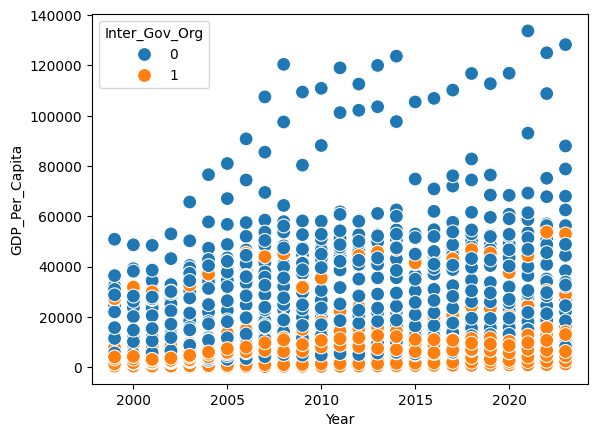

In [198]:
# scatter plot
sns.scatterplot(data=df, x='Year', y='GDP_Per_Capita', color='blue', s=100, hue='Inter_Gov_Org')
plt.show()

Text(0, 0.5, 'Average GDP Per Capita')

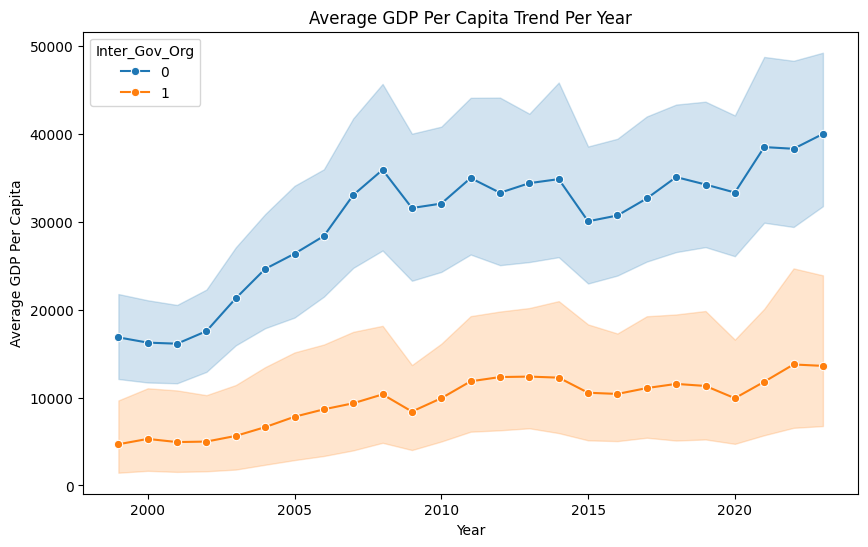

In [199]:
# Plot the GDP per capita trend per year using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='GDP_Per_Capita', marker='o', hue='Inter_Gov_Org')

# Add titles and labels
plt.title('Average GDP Per Capita Trend Per Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')

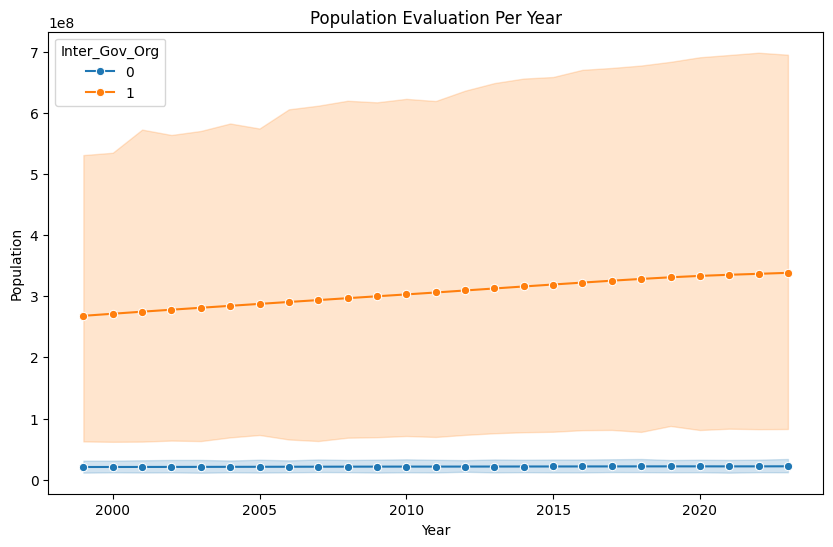

In [200]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Population', marker='o', hue='Inter_Gov_Org')

# Add titles and labels
plt.title('Population Evaluation Per Year')
plt.xlabel('Year')
plt.ylabel('Population')

# Show the plot
plt.show()

In [201]:
df.dtypes

Country            object
Country_Code       object
Year                int64
Population          int64
GDP_Per_Capita    float64
Inter_Gov_Org       int64
dtype: object

In [202]:
# define the target variable
y = df['GDP_Per_Capita']

# define the features
X = df[['Inter_Gov_Org','Year']]

# ouput 
print('Target variable: ', y.shape)
print('Features: ', X.shape)

Target variable:  (1050,)
Features:  (1050, 2)


In [203]:
X.head()

,Inter_Gov_Org,Year
25,0,1999
26,0,2000
27,0,2001
28,0,2002
29,0,2003


In [204]:
y.head()

25    1033.24
26    1126.68
27    1281.66
28    1425.12
29    1846.12
Name: GDP_Per_Capita, dtype: float64

In [205]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [206]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((840, 2), (210, 2), (840,), (210,))

In [207]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score

## Linear Regression

rmse:  21493.92188449609
r_square:  0.17810530731885754


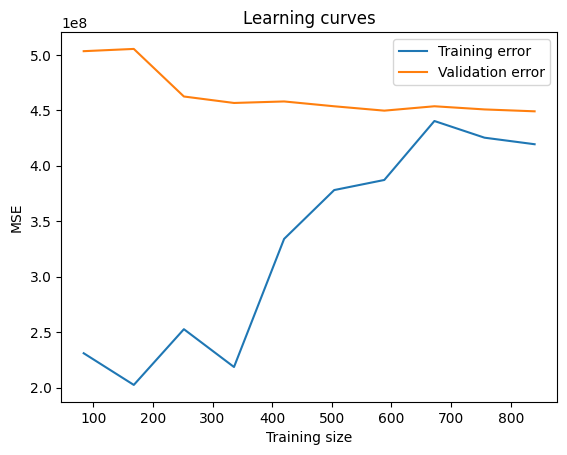

In [208]:
## Train the model 
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

## make precdictions
linear_pred = linear_reg.predict(X_test)

## Model Evaluation
linear_r2 = r2_score(y_test, linear_pred)
linear_rmse = root_mean_squared_error(y_test, linear_pred)

## output results
print('rmse: ', linear_rmse)
print('r_square: ', linear_r2)

## Learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2025    0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Lasso 

root_mean_squared_error: 21493.9062735686
root square: 0.17810650119439697


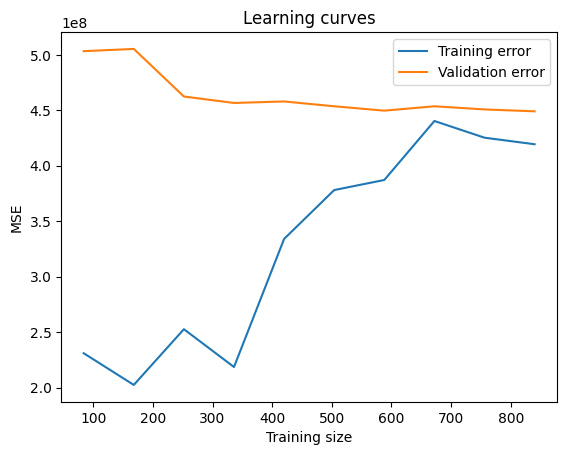

In [209]:
# Build a Lasso regression model
lasso_reg = Lasso()

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_reg.predict(X_test)

# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')

# 
train_sizes, train_scores, test_scores = learning_curve(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

## ElasticNet Model

root_mean_squared_error: 21723.193296421967
root square: 0.1604778154605091


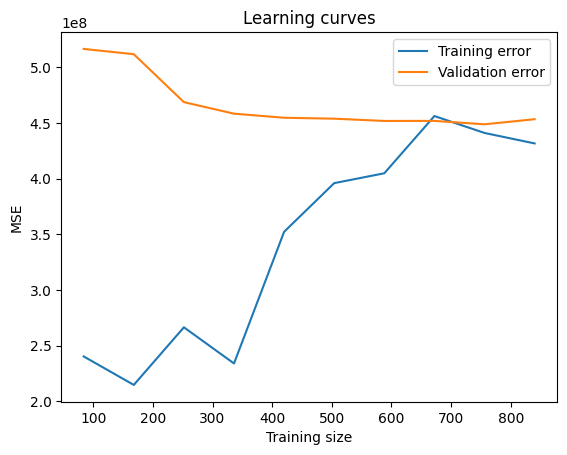

In [210]:
# Train the model 
elastic_net_reg = ElasticNet()

elastic_net_reg.fit(X_train, y_train)

# make predictions
elastic_net_pred = elastic_net_reg.predict(X_test)

# Evaluate the model
elastic_net_rmse = root_mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# output result
print(f'root_mean_squared_error: {elastic_net_rmse}')
print(f'root square: {elastic_net_r2}')

#
train_sizes, train_scores, test_scores = learning_curve(elastic_net_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

In [211]:
# Create a DataFrame with the evaluation metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression'],
    'Mean Squared Error': [linear_rmse, lasso_rmse, elastic_net_rmse],
    'R^2 Score': [linear_r2, lasso_r2, elastic_net_r2]
})

In [212]:
results

,Model,Mean Squared Error,R^2 Score
0,Linear Regression,21493.921884,0.178105
1,Lasso Regression,21493.906274,0.178107
2,ElasticNet Regression,21723.193296,0.160478
